In [1]:
from skfuzzy import control as ctrl
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt


class washing_machine:

    degree_dirt = ctrl.Antecedent(np.arange(0, 101, 1), 'degree_dirt')
    type_dirt = ctrl.Antecedent(np.arange(0, 101, 1), 'type_dirt')
    wash_time = ctrl.Consequent(np.arange(0, 61, 1), 'wash_time(min)')

    
  
    #Degree of Dirt Membership function
    degree_dirt['Low'] =  fuzz.trimf(type_dirt.universe,[0,0,50])
    degree_dirt['Medium'] =  fuzz.trimf(type_dirt.universe,[0,50,100])
    degree_dirt['High'] =  fuzz.trimf(type_dirt.universe,[50,100,100])
    
    #Type Dirt Membership Function
    type_dirt['Light'] =  fuzz.trimf(type_dirt.universe,[0,0,50])
    type_dirt['Medium'] =  fuzz.trimf(type_dirt.universe,[0,50,100])
    type_dirt['Heavy'] =  fuzz.trimf(type_dirt.universe,[50,100,100])

    # Washing Time Membership function
    wash_time['very_short'] = fuzz.trapmf(wash_time.universe, [0, 0, 8, 12])
    wash_time['short'] = fuzz.trapmf(wash_time.universe, [8, 12, 20, 24])
    wash_time['medium'] = fuzz.trapmf(wash_time.universe, [20, 24, 36, 40])
    wash_time['long'] = fuzz.trapmf(wash_time.universe, [36, 40, 56, 60])
    wash_time['VeryLong'] = fuzz.trapmf(wash_time.universe, [56, 60, 61, 61])


    # Rule Application
    rule1 = ctrl.Rule(degree_dirt['High'] & type_dirt['Heavy'], wash_time['VeryLong'])
    rule2 = ctrl.Rule(degree_dirt['Medium'] & type_dirt['Heavy'], wash_time['long'])
    rule3 = ctrl.Rule(degree_dirt['Low'] & type_dirt['Heavy'], wash_time['long'])
    rule4 = ctrl.Rule(degree_dirt['High'] & type_dirt['Medium'], wash_time['long'])
    rule5 = ctrl.Rule(degree_dirt['Medium'] & type_dirt['Medium'], wash_time['medium'])
    rule6 = ctrl.Rule(degree_dirt['Low'] & type_dirt['Medium'], wash_time['medium'])
    rule7 = ctrl.Rule(degree_dirt['High'] & type_dirt['Light'], wash_time['medium'])
    rule8 = ctrl.Rule(degree_dirt['Medium'] & type_dirt['Light'], wash_time['short'])
    rule9 = ctrl.Rule(degree_dirt['Low'] & type_dirt['Light'], wash_time['very_short'])

    # Ang Washing Control Simulation na Part
    washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
    washing = ctrl.ControlSystemSimulation(washing_ctrl)
    


def fuzzify_laundry(fuzz_type,fuzz_degree):

    washing_machine.washing.input['type_dirt'] = fuzz_type
    washing_machine.washing.input['degree_dirt'] = fuzz_degree

    
    washing_machine.washing.compute()

    washing_machine.wash_time.view(sim=washing_machine.washing)

    return washing_machine.washing.output['wash_time(min)']

def plot_membership_functions():
    # Plot degree of dirtiness membership functions
    washing_machine.degree_dirt.view()
    plt.title('Membership Functions for Degree of Dirtiness')
    plt.show()

    # Plot type of dirt membership functions
    washing_machine.type_dirt.view()
    plt.title('Membership Functions for Type of Dirt')
    plt.show()

    # Plot wash time membership functions
    washing_machine.wash_time.view()
    plt.title('Membership Functions for Wash Time')
    plt.show()



c:\Users\cmcod\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


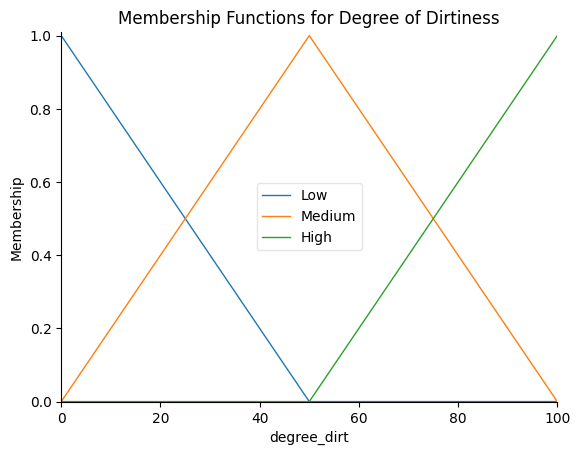

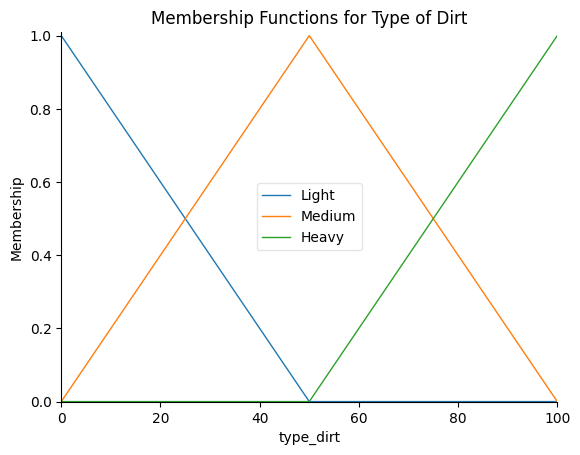

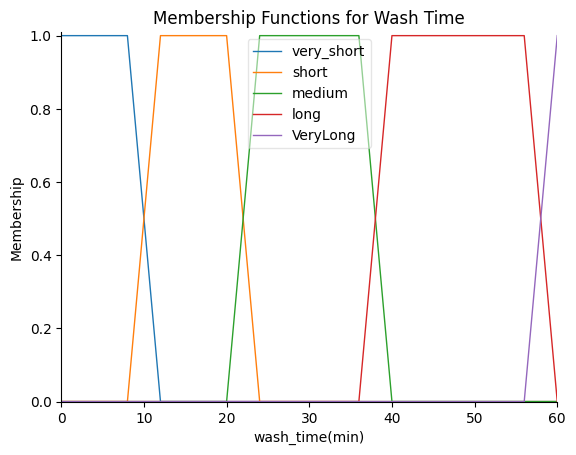

In [2]:
plot_membership_functions()

Washing Time in Minutes: 41.646518824136145


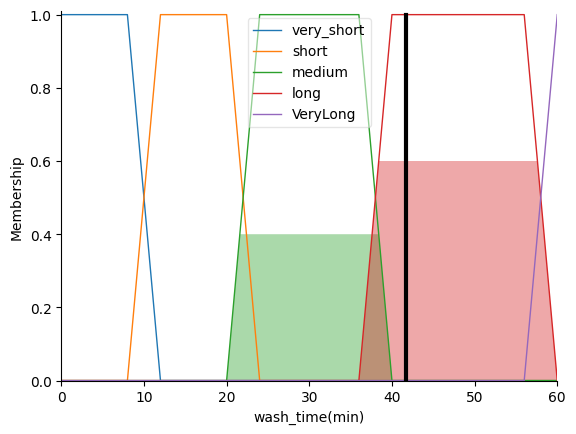

In [5]:
def compute_washing_parameters(type_of_dirt,degree_of_dirt):

    if type_of_dirt < 0.0 or type_of_dirt > 100.0:
        raise Exception("Invalid Type of Dirtiness: %lf" %type_of_dirt)
    if degree_of_dirt < 0.0 or type_of_dirt > 100.0:
        raise Exception("Invalid Degree of Dirtiness: %lf" %degree_of_dirt)

    type_fuzzy = fuzzify_laundry(type_of_dirt,degree_of_dirt)

    return type_fuzzy


if __name__ == "__main__":
    degree_of_dirt = float(input("Enter Degree of Dirtiness [0-100]: "))
    type_of_dirt = float(input("Enter Type of Dirtiness [0-100]: "))
    washing_parameters = compute_washing_parameters(type_of_dirt,degree_of_dirt)
    print(f"Washing Time in Minutes: {washing_parameters}")

